<a href="https://colab.research.google.com/github/farisshabukker/Prediction-using-Supervised-ML/blob/main/TASK_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AUTHOR : FARIS SHABUKKER

TECHNICAL TASK 1 : PREDICTION USING SUPERVISED ML (LEVEL BEGINNER) 

In this task we predict the percentage of marks of a student based on the number of hours they study. This is a simple linear regression task since it involes 2 variables.

---



In [3]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [22]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)


data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [17]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [18]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

We plot our data poInts to see if we can find any relationship between the data

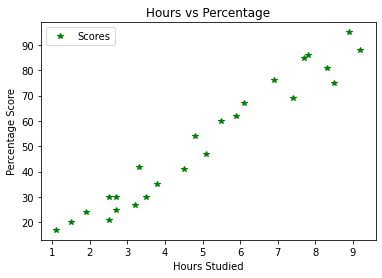

In [20]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='*',color='green')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**INTERPRETATION : From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

### **Preparing the Data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs). attributes will be "hours" column and labels will be "scores" column

In [21]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [24]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [25]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

 the next step is to split this dataset  into train and test data.

In [7]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

**Training the Algorithm**

We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [8]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


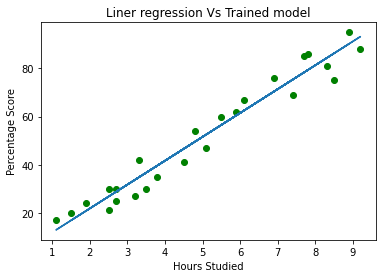

In [30]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_
plt.title("Liner regression Vs Trained model")
plt.scatter(X, y,color='green')
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.plot(X, line);
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [33]:
 # Testing data - In Hours
print(X_test) 
 # Predicting the scores
y_pred = regressor.predict(X_test)
y_pred

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [11]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


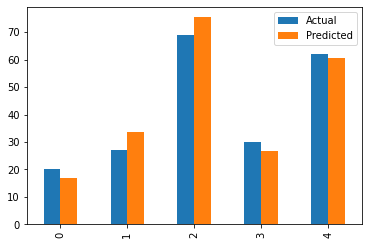

In [34]:
df.plot(kind='bar')

In [38]:
# You can also test with your own data
hours = 9.25
test=np.array([hours])
test=test.reshape(-1,1)
pred=regressor.predict([[9.5]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = 9.25
Predicted Score = 96.16939660753593


## **Evaluating the model**

In [39]:
from sklearn import metrics

In [41]:
print('Mean Absolute Error is : ' ,metrics.mean_absolute_error(y_test,y_pred))
print('Mean Square Error is : ' ,metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error is :' ,np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

Mean Absolute Error is :  4.183859899002982
Mean Square Error is :  21.598769307217456
Root Mean Squared Error is : 2.0454485813637513


In [42]:
print("Slope of Regression Line",regressor.coef_)
print("y-intercept of Regression Line",regressor.intercept_)

Slope of Regression Line [9.91065648]
y-intercept of Regression Line 2.018160041434662


**INTERPRETATION**
The best fitted simple linear equation is y = 2.018160041434662 + 9.91065648(x) where x is the no of hours studied and y is the percentage score.